In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad
# display Chinese in gragh
plt.rcParams['font.sans-serif']=['SimHei']
# display "-" in gragh
plt.rcParams['axes.unicode_minus']=False

# 定义原函数
def f(x):
    return np.exp(x)

# 定义正交多项式
def phi(n, k, x, flag):
    if k == 0:
        return np.ones_like(x)
    elif k == 1:
        return x
    elif k > 1:
        if flag == 0:
            return x**k
        elif flag == 1:
            # 使用Legendre多项式
            p = legendre(k)
            return p(x)

# 计算最佳平方逼近多项式系数
def compute_coefficients(n, flag):
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    for i in range(n+1):
        for j in range(n+1):
            integrand = lambda x: phi(n, i, x, flag) * phi(n, j, x, flag)
            A[i, j], _ = quad(integrand, 0, 1)
        integrand_f = lambda x: f(x) * phi(n, i, x, flag)
        b[i], _ = quad(integrand_f, 0, 1)
    return np.linalg.solve(A, b)

# 生成逼近多项式函数
def approximation_function(n, x, flag):
    coefficients = compute_coefficients(n, flag)
    result = np.zeros_like(x)
    for i in range(n+1):
        result += coefficients[i] * phi(n, i, x, flag)
        print(coefficients[i])
    return result

# 绘制图像
def plot_comparison(n, flag):
    x = np.linspace(0, 1, 1000)
    plt.plot(x, f(x), label='原函数$y=e^x$')
    plt.plot(x, approximation_function(n, x, flag), label='平方逼近多项式$y=p_{n}(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # plt.title('Comparison between original and approximation function (n={})'.format(n))
    plt.legend()
    plt.show()

# 绘制局部放大图像
def plot_local_enlargement(n, flag):
    x = np.linspace(0.499995, 0.500005, 1000)
    plt.figure(figsize=(6, 8))
    plt.plot(x, f(x), label='原函数$y=e^x$')
    plt.plot(x, approximation_function(n, x, flag), label='平方逼近多项式$y=p_{n}(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # plt.title('Comparison between original and approximation function (n={})'.format(n))
    plt.xlim(0.499995, 0.500005)
    plt.legend()
    plt.show()

plot_comparison(5,0)  # n=5, x^k

0.9999975939481748
1.000099801486657
0.49901917513980787
0.1704895392633275
0.03480111544339166
0.013872004898576736


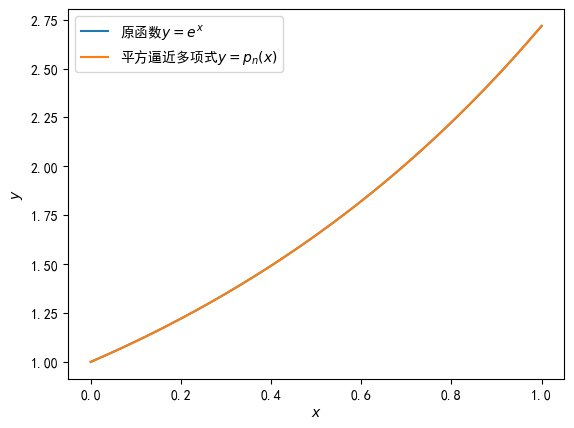

In [160]:
# plot the gragh and print the coefficients
plot_comparison(5,0)  # n=5, x^k

1.1732975422355196
1.1083386696360753
0.3525658021585433
0.07436115096015425
0.007954540780936126
0.001761524408117519


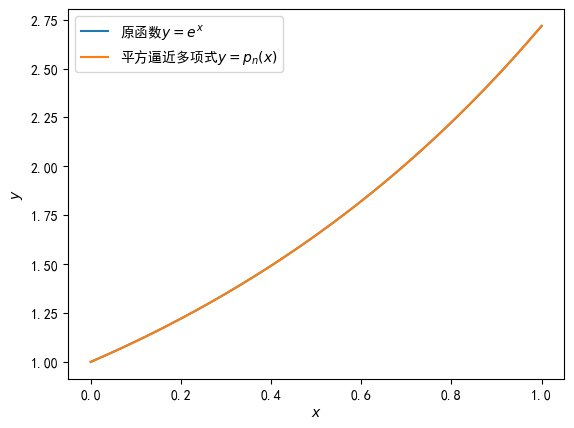

In [161]:
plot_comparison(5,1)  # n=5, Legendre polynomial

1.0000000012113701
0.9999998681210073
0.5000035268463334
0.16662625984232918
0.04191227935312167
0.007455096067967402
0.0033287923143171866
-0.002479244981759852
0.0022732391669669206
-0.0010475780120787397
0.00020958957362995516


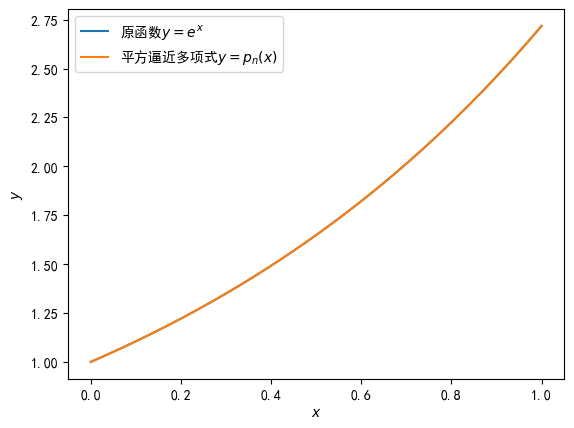

In [162]:
plot_comparison(10,0) # n=10, x^k

1.17610487769128
1.1012448045699013
0.3609156609890722
0.06749975436161927
0.01221017595693133
-0.0002873295948090008
0.0007933224883379857
-0.0002668997568865246
8.219614376558308e-05
-1.6453268506992322e-05
1.7202942628052338e-06


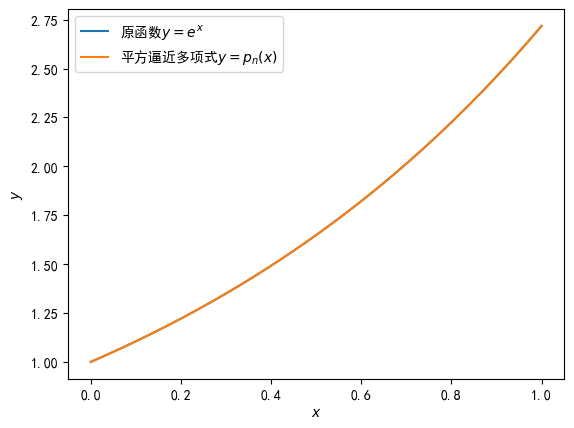

In [163]:
plot_comparison(10,1) # n=10, Legendre polynomial

1.0000000012113701
0.9999998681210073
0.5000035268463334
0.16662625984232918
0.04191227935312167
0.007455096067967402
0.0033287923143171866
-0.002479244981759852
0.0022732391669669206
-0.0010475780120787397
0.00020958957362995516


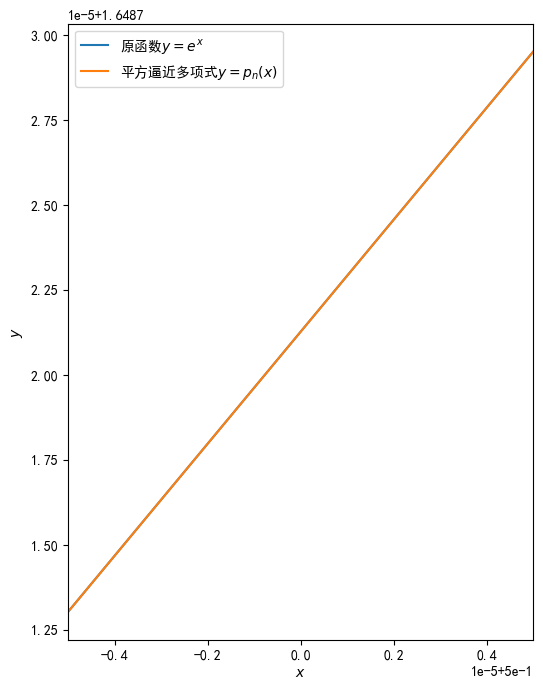

In [164]:
plot_local_enlargement(10, 0)

0.9999975939481748
1.000099801486657
0.49901917513980787
0.1704895392633275
0.03480111544339166
0.013872004898576736


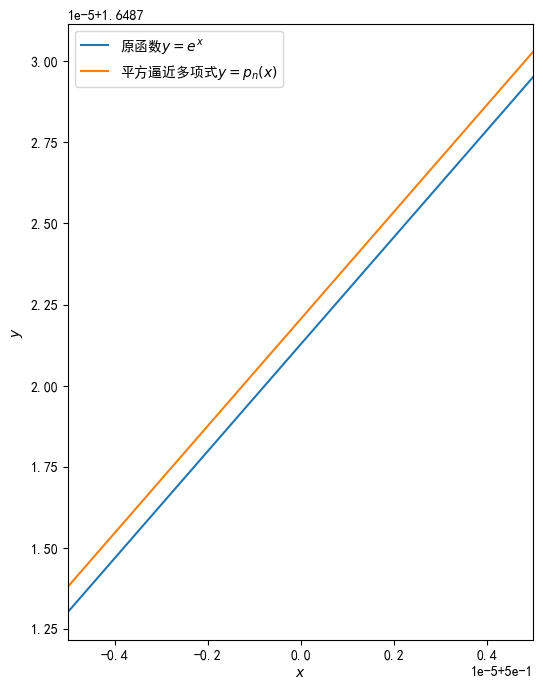

In [165]:
plot_local_enlargement(5, 0)